In [27]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [28]:
titanic = pd.read_csv("titanic.csv")

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Prediction of survival

### Corelation with Age group 

In [32]:
def age_group (age):
    """
    Age is continous variable. 
    Breaking down into categorical data.
    
    """
    if age<2:
        return "Infant"
    elif age<18:
        return "Child"
    elif age<60:
        return "Adult"
    else:
        return "Senior"

In [33]:
titanic["Age_group"] = titanic.Age.map(age_group)

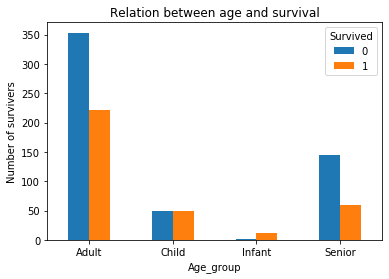

Survived,0,1
Age_group,,
Adult,353,222
Child,50,49
Infant,2,12
Senior,144,59


In [34]:
age_sur = titanic.groupby(["Age_group","Survived"]).size().unstack()
age_sur.plot(kind = "bar")
plt.title("Relation between age and survival")
plt.xlabel("Age_group")
plt.ylabel("Number of survivers")
plt.xticks(rotation = 0)
plt.show()
age_sur


#### Death to survived ratio is highest for adults and least for Infants.
$ Infants>Children>Senior>Adult$

### Corelation with Gender

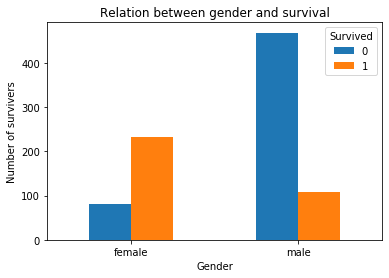

Survived,0,1
Sex,,
female,81,233
male,468,109


In [35]:
sex_sur = titanic.groupby(["Sex","Survived"]).size().unstack()
sex_sur.plot(kind = "bar")
plt.title("Relation between gender and survival")
plt.xlabel("Gender")
plt.ylabel("Number of survivers")
plt.xticks(rotation = 0)
plt.show()
sex_sur

$Female>Male$

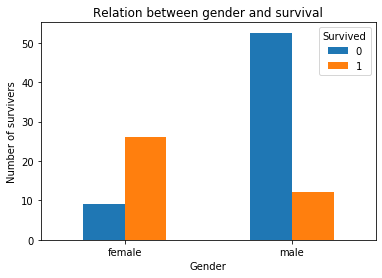

Survived,0,1
Sex,,
female,9.09,26.15
male,52.53,12.23


In [36]:
sex_sur_per = round(titanic.groupby(["Sex","Survived"]).size()/titanic["Sex"].count()*100,2)
sex_sur_per.unstack().plot(kind = "bar")
plt.title("Relation between gender and survival")
plt.xlabel("Gender")
plt.ylabel("Number of survivers")
plt.xticks(rotation = 0)
plt.show()
sex_sur_per.unstack()

### Corelation with Fare

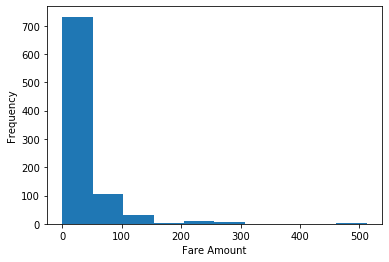

In [37]:
titanic.Fare.plot(kind = "hist")
plt.xlabel("Fare Amount")
plt.show()

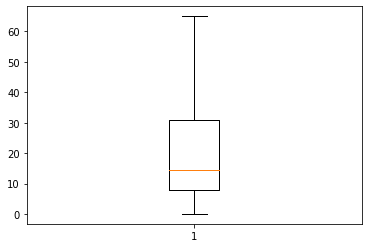

In [38]:
plt.boxplot(titanic.Fare, showfliers=False)
plt.show()

#### Most of the people bought low price tickets.

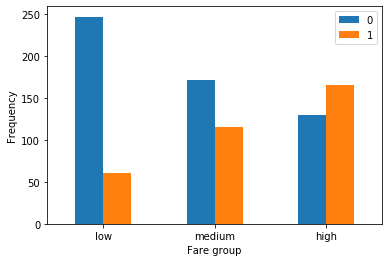

In [39]:
titanic["Fare_group"] = pd.qcut(titanic.Fare,3, labels=["low","medium","high"])
'''
Fare is a countinous variable so categorizing it in 3 parts "low, medium and high". 

'''
fare_sur = titanic.groupby(["Fare_group","Survived"]).size().unstack()
fare_sur.plot(kind = "bar")
plt.xlabel("Fare group")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation = 0)
plt.show()

#### People paying more has better chance of survival.
$high>medium>low$

### Corelation with Class

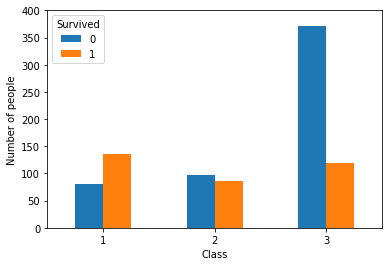

In [40]:
class_sur = titanic.groupby(["Pclass","Survived"]).size().unstack()
class_sur.plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Number of people")
plt.ylim(0,400)
plt.xticks(rotation = 0)
plt.show()

$First Class> Second Class > Third Class$

### Corelation with cabin

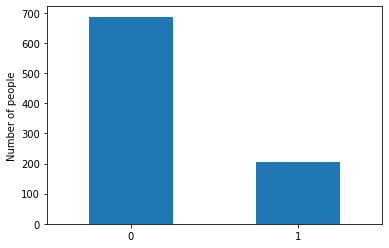

In [41]:
titanic.Cabin.fillna(0, inplace = True)
titanic["Cabin"] = [0 if i==0 else 1 for i in titanic.Cabin]
titanic.Cabin.value_counts().plot(kind = "bar")
plt.ylabel("Number of people")
plt.xticks(rotation = 0)
plt.show()

####                                                               Less people got cabin.

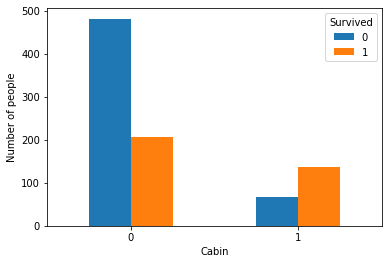

Survived,0,1
Cabin,,
0,481,206
1,68,136


In [42]:
titanic.Cabin.fillna(0, inplace = True)
titanic["Cabin"] = [0 if i==0 else 1 for i in titanic.Cabin]
cabin_sur = titanic.groupby(["Cabin","Survived"]).size().unstack()
cabin_sur.plot(kind = "bar")
plt.xlabel("Cabin")
plt.ylabel("Number of people")
plt.xticks(rotation = 0)
plt.show()
cabin_sur

#### Geting a cabin will increase your changes of survival

### Corelation with family

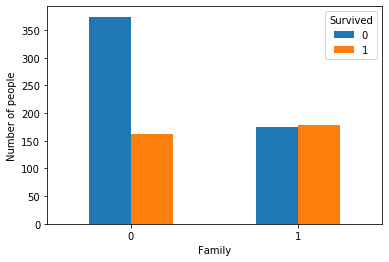

Survived,0,1
Family,,
0,374,163
1,175,179


In [59]:
titanic["Family"] = [1 if titanic.Parch[i]+titanic.SibSp[i]>0 else 0 for i in range(len(titanic))]
fam_sur = titanic.groupby(["Family","Survived"]).size().unstack()
fam_sur.plot(kind = "bar")
plt.xticks(rotation = 0)
plt.xlabel("Family")
plt.ylabel("Number of people")
plt.show()
fam_sur

### Corelation with Embarked

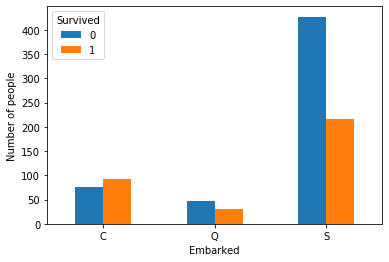

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [44]:
emb_sur = titanic.groupby(["Embarked","Survived"]).size().unstack()
emb_sur.plot(kind = "bar")
plt.xticks(rotation = 0)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()
emb_sur

### Title

In [45]:
titanic["Title"] = [i.split(" ")[1] for i in titanic.Name]

### Age and gender

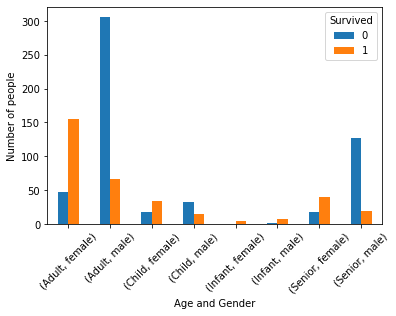

In [46]:
age_gen_sur = titanic.groupby(["Age_group","Sex","Survived"]).size().unstack()
age_gen_sur.plot(kind = "bar")
plt.xlabel("Age and Gender")
plt.ylabel("Number of people")
plt.xticks(rotation = 45)
plt.show()

#### Females' survival number is higher in all 4 age groups.

### Fare and gender

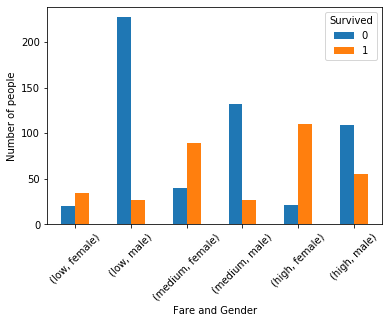

Survived             0    1
Fare_group Sex             
low        female   20   34
           male    227   27
medium     female   40   89
           male    132   27
high       female   21  110
           male    109   55

In [47]:
fare_gen_sur = titanic.groupby(["Fare_group","Sex","Survived"]).size().unstack()
fare_gen_sur.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.xlabel("Fare and Gender")
plt.ylabel("Number of people")
plt.show()
fare_gen_sur

#### Females' have better survival number in all fare group.


### Fare and Age

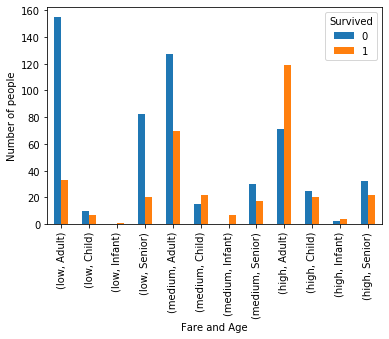

In [48]:
fare_age_sur = titanic.groupby(["Fare_group","Age_group","Survived"]).size().unstack()
fare_age_sur.plot(kind = "bar")
plt.xlabel("Fare and Age")
plt.ylabel("Number of people")
plt.show()

### Cabin and Fare


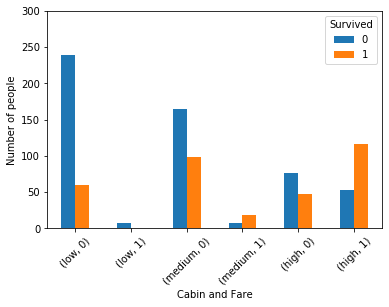

Survived            0    1
Fare_group Cabin          
low        0      239   60
           1        8    1
medium     0      165   98
           1        7   18
high       0       77   48
           1       53  117

In [49]:
cabin_fare_sur = titanic.groupby(["Fare_group","Cabin","Survived"]).size().unstack()
cabin_fare_sur.plot(kind = "bar")
plt.ylim(0,300)
plt.xticks(rotation = 45)
plt.xlabel("Cabin and Fare")
plt.ylabel("Number of people")
plt.show()
cabin_fare_sur

#### Survival to death ratio is lowest of people with low fare ticket and no cabin and highest for people who had expensive tickets and had a cabin. But That is not true for people who paid premium but didn't get cabin.
#### Compared in same price range people with cabin have better chances of survival.

### Class and Family

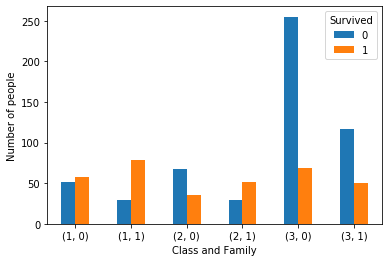

In [50]:
class_fam_sur = titanic.groupby(["Pclass","Family","Survived"]).size().unstack()
class_fam_sur.plot(kind = "bar")
plt.xlabel("Class and Family")
plt.ylabel("Number of people")
plt.xticks(rotation = 0)
plt.show()

#### In all three classes people with families had better chane of survival than who didn't, highest being First Class.

### Gender, Fare, Age

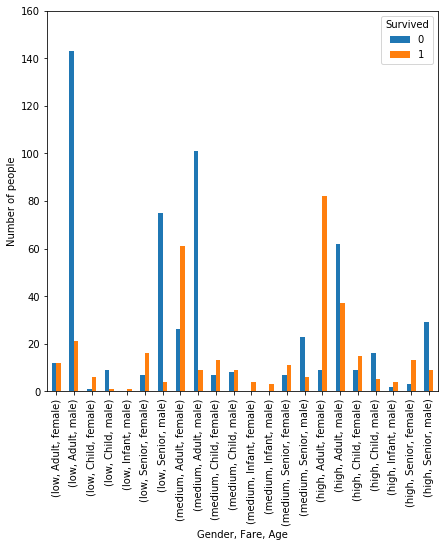

Survived                         0     1
Fare_group Age_group Sex                
low        Adult     female   12.0  12.0
                     male    143.0  21.0
           Child     female    1.0   6.0
                     male      9.0   1.0
           Infant    male      NaN   1.0
           Senior    female    7.0  16.0
                     male     75.0   4.0
medium     Adult     female   26.0  61.0
                     male    101.0   9.0
           Child     female    7.0  13.0
                     male      8.0   9.0
           Infant    female    NaN   4.0
                     male      NaN   3.0
           Senior    female    7.0  11.0
                     male     23.0   6.0
high       Adult     female    9.0  82.0
                     male     62.0  37.0
           Child     female    9.0  15.0
                     male     16.0   5.0
           Infant    male      2.0   4.0
           Senior    female    3.0  13.0
                     male     29.0   9.0

In [51]:
gen_fare_age_sur = titanic.groupby(["Fare_group","Age_group","Sex","Survived"]).size().unstack()
gen_fare_age_sur.plot(kind = "bar", figsize = (7,7))
plt.xlabel("Gender, Fare, Age")
plt.ylabel("Number of people")
plt.ylim(0,160)
plt.show()
gen_fare_age_sur

In [55]:
for i in range(len(titanic.Parch)):
    print(titanic.Parch[i])

0
0
0
0
0
0
0
1
2
0
1
0
0
5
0
0
1
0
0
0
0
0
0
0
1
5
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
1
0
0
0
2
2
0
0
0
2
0
1
0
0
2
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
3
0
2
0
0
0
0
2
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
1
0
2
2
0
0
0
0
2
0
1
0
0
0
2
1
0
0
0
1
2
1
4
0
0
0
1
1
0
0
1
1
0
0
0
2
0
2
1
2
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
2
1
0
0
1
0
0
2
2
0
0
0
1
0
2
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
0
0
0
0
2
0
0
0
0
0
2
1
0
1
0
0
0
2
1
0
0
0
1
2
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
4
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
2
0
0
0
0
2
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
2
0
2
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
2
2
3
4
0
1
0
0
0
0
2
1
0
1
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
1
2
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
2
0
